In [1]:
# importing libraries(modules)
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# loading dataframes
patients = pd.read_csv('patients.csv')
treatments = pd.read_csv('treatments.csv')
adverse_reactions = pd.read_csv('adverse_reactions.csv')
treatments_cut = pd.read_csv('treatments_cut.csv')

In [3]:
# view dataset
patients.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1


In [4]:
#view dataset
treatments.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


In [5]:
# view dataset
treatments_cut.shape

(70, 7)

In [6]:
# view dataset
adverse_reactions

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation
5,jasmine,sykes,hypoglycemia
6,louise,johnson,hypoglycemia
7,albinca,komavec,hypoglycemia
8,noe,aranda,hypoglycemia
9,sofia,hermansen,injection site discomfort


### 1.Summary for data

This is a dataset about 500 patients of which 350 patients participated in a clinical trial. None of the patients were using Novodra (a popular injectable insulin) or Auralin (the oral insulin being researched) as their primary source of insulin before. All were experiencing elevated HbA1c levels.

All 350 patients were treated with Novodra to establish a baseline HbA1c level and insulin dose. After 4 weeks, which isn’t enough time to capture all the change in HbA1c that can be attributed by the switch to Auralin or Novodra:

- 175 patients switched to Auralin for 24 weeks
- 175 patients continued using Novodra for 24 weeks

Data about patients feeling some adverse effects is also recorded.

### 2.Column descriptions

#### **Table** -> `patients`:

- `patient_id`: the unique identifier for each patient in the Master Patient Index (i.e. patient database) of the pharmaceutical company that is producing Auralin
- `assigned_sex`: the assigned sex of each patient at birth (male or female)
- `given_name`: the given name (i.e. first name) of each patient
- `surname`: the surname (i.e. last name) of each patient
- `address`: the main address for each patient
- `city`: the corresponding city for the main address of each patient
- `state`: the corresponding state for the main address of each patient
- `zip_code`: the corresponding zip code for the main address of each patient
- `country`: the corresponding country for the main address of each patient (all United states for this clinical trial)
- `contact`: phone number and email information for each patient
- `birthdate`: the date of birth of each patient (month/day/year). The inclusion criteria for this clinical trial is age >= 18 (there is no maximum age because diabetes is a growing problem among the elderly population)
- `weight`: the weight of each patient in pounds (lbs)
- `height`: the height of each patient in inches (in)
- `bmi`: the Body Mass Index (BMI) of each patient. BMI is a simple calculation using a person's height and weight. The formula is BMI = kg/m2 where kg is a person's weight in kilograms and m2 is their height in metres squared. A BMI of 25.0 or more is overweight, while the healthy range is 18.5 to 24.9. The inclusion criteria for this clinical trial is 16 >= BMI >= 38.

#### **Table** -> `treatments` and `treatment_cut`:

- `given_name`: the given name of each patient in the Master Patient Index that took part in the clinical trial
- `surname`: the surname of each patient in the Master Patient Index that took part in the clinical trial
- `auralin`: the baseline median daily dose of insulin from the week prior to switching to Auralin (the number before the dash) and the ending median daily dose of insulin at the end of the 24 weeks of treatment measured over the 24th week of treatment (the number after the dash). Both are measured in units (shortform 'u'), which is the international unit of measurement and the standard measurement for insulin.
- `novodra`: same as above, except for patients that continued treatment with Novodra
- `hba1c_start`: the patient's HbA1c level at the beginning of the first week of treatment. HbA1c stands for Hemoglobin A1c. The HbA1c test measures what the average blood sugar has been over the past three months. It is thus a powerful way to get an overall sense of how well diabetes has been controlled. Everyone with diabetes should have this test 2 to 4 times per year. Measured in %.
- `hba1c_end`: the patient's HbA1c level at the end of the last week of treatment
- `hba1c_change`: the change in the patient's HbA1c level from the start of treatment to the end, i.e., hba1c_start - hba1c_end. For Auralin to be deemed effective, it must be "noninferior" to Novodra, the current standard for insulin. This "noninferiority" is statistically defined as the upper bound of the 95% confidence interval being less than 0.4% for the difference between the mean HbA1c changes for Novodra and Auralin (i.e. Novodra minus Auralin).

#### **Table** -> `adverse_reactions`

- `given_name`: the given name of each patient in the Master Patient Index that took part in the clinical trial and had an adverse reaction (includes both patients treated Auralin and Novodra)
- `surname`: the surname of each patient in the Master Patient Index that took part in the clinical trial and had an adverse reaction (includes both patients treated Auralin and Novodra)
- `adverse_reaction`: the adverse reaction reported by the patient

### 3.additional information

Additional useful information:

- Insulin resistance varies person to person, which is why both starting median daily dose and ending median daily dose are required, i.e., to calculate change in dose.
- It is important to test drugs and medical products in the people they are meant to help. People of different age, race, sex, and ethnic group must be included in clinical trials. This diversity is reflected in the patients table.

### Issues with the dataset

1. Dirty Data

  Table - `Patients`

    - patient_id = 9 has misspelled name 'Dsvid' instead of David `accuracy issue`
    - state col sometimes contain full name and some times abbrivietation `consistency issue`
    - zip code col has entries with 4 digit `validity issue`
    - data missing for 12 patients in address,city,	state,zip_code	,country,	contact `completion issue`
    - incorrect data type assigned to sex, zip code, birthdate `validity issue`
    - duplicate entries by the name of John Doe `accuracy issue`
    - one patient has weight = 48 pounds `accuracy issue`
    - one patient has height = 27 inches `accuracy issue`

  Table - `Treatments` & `Treatments_cut`

    - given_name and surname col is all lower case `consistency issue`
    - remove u from Auralin and Novadra cols `validity issue`
    - '-' in novadra and Auralin col treated as nan `validity issue`
    - missing values in hba1c_change col `completion issue`
    - 1 duplicate entry by the name Joseph day `accuracy issue`
    - in hba1c_change 9 instead of 4 `accuracy issue`

  Table - `Adverse_reactions`

    - given_name and surname are all in lower case `consistency issue`

2. Messy Data

  Table - `Patients`

    - contact col contains both phone and email

  Table - `Treatments` & `Treatments_cut`

    - Auralin and Novadra col should be split into 2 cols start and end dose
    - merge both the tables

  Table - `Adverse_reactions`

    - This table should not exist independently

In [7]:
# view dataset information
adverse_reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   given_name        34 non-null     object
 1   surname           34 non-null     object
 2   adverse_reaction  34 non-null     object
dtypes: object(3)
memory usage: 944.0+ bytes


In [8]:
# finding Nan(null) values in the patients dataframe
patients[patients['address'].isnull()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
209,210,female,Lalita,Eldarkhanov,NaN,NaN,NaN,NaN,NaN,NaN,8/14/1950,143.4,62,26.2
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
257,258,male,Jin,Kung,NaN,NaN,NaN,NaN,NaN,NaN,5/17/1995,231.7,69,34.2
264,265,female,Wafiyyah,Asfour,NaN,NaN,NaN,NaN,NaN,NaN,11/3/1989,158.6,63,28.1
269,270,female,Flavia,Fiorentino,NaN,NaN,NaN,NaN,NaN,NaN,10/9/1937,175.2,61,33.1
278,279,female,Generosa,Cabán,NaN,NaN,NaN,NaN,NaN,NaN,12/16/1962,124.3,69,18.4


In [9]:
# finding duplicates in the treatments dataframe
treatments[treatments.duplicated()]

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
136,joseph,day,29u - 36u,-,7.7,7.19,NaN


In [10]:
# finding duplicates of the specific columns in the treatments dataframe
treatments[treatments.duplicated(subset=['given_name'	,'surname'])]

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
136,joseph,day,29u - 36u,-,7.7,7.19,NaN


In [11]:
# finding duplicates of the specific columns in the treatments dataframe
treatments_cut[treatments_cut.duplicated(subset=['given_name'	,'surname'])]

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change


In [12]:
# checking duplicates in the adverse_reactions dataframe
adverse_reactions.duplicated().sum()

0

In [13]:
# performing important operations on the dataframe using describe() function
patients.describe()

,patient_id,zip_code,weight,height,bmi
count,503.000000,491.000000,503.000000,503.000000,503.000000
mean,252.000000,49084.118126,173.434990,66.634195,27.483897
std,145.347859,30265.807442,33.916741,4.411297,5.276438
min,1.000000,1002.000000,48.800000,27.000000,17.100000
25%,126.500000,21920.500000,149.300000,63.000000,23.300000
50%,252.000000,48057.000000,175.300000,67.000000,27.200000
75%,377.500000,75679.000000,199.500000,70.000000,31.750000
max,503.000000,99701.000000,255.900000,79.000000,37.700000


In [14]:
# checking specific values from height column in the patients dataframe
patients[patients['height'] == 27]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1


In [15]:
# performing specific operations on the treatments_cut dataframe
treatments_cut.describe()

,hba1c_start,hba1c_end,hba1c_change
count,70.000000,70.000000,42.000000
mean,7.838000,7.443143,0.518810
std,0.423007,0.418706,0.270719
min,7.510000,7.020000,0.280000
25%,7.640000,7.232500,0.340000
50%,7.730000,7.345000,0.370000
75%,7.860000,7.467500,0.907500
max,9.910000,9.460000,0.970000


In [16]:
# sorting the values in the columns for better readibility
treatments.sort_values('hba1c_change',na_position='first')

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
8,saber,ménard,-,54u - 54u,8.08,7.70,NaN
9,asia,woźniak,30u - 36u,-,7.76,7.37,NaN
10,joseph,day,29u - 36u,-,7.70,7.19,NaN
...,...,...,...,...,...,...,...
49,jackson,addison,-,42u - 42u,7.99,7.51,0.98
17,gina,cain,-,36u - 36u,7.88,7.40,0.98
32,laura,ehrlichmann,-,43u - 40u,7.95,7.46,0.99
245,wu,sung,-,47u - 48u,7.61,7.12,0.99


In [17]:
# making a copy of the each dataframe to avoid losing data using copy() function
patients_df = patients.copy()
treatments_df = treatments.copy()
treatments_cut_df = treatments_cut.copy()
adverse_reactions_df = adverse_reactions.copy()

In [18]:
# code
patients_df.fillna('No data',inplace=True)

In [19]:
# test
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id    503 non-null    int64  
 1   assigned_sex  503 non-null    object 
 2   given_name    503 non-null    object 
 3   surname       503 non-null    object 
 4   address       503 non-null    object 
 5   city          503 non-null    object 
 6   state         503 non-null    object 
 7   zip_code      503 non-null    object 
 8   country       503 non-null    object 
 9   contact       503 non-null    object 
 10  birthdate     503 non-null    object 
 11  weight        503 non-null    float64
 12  height        503 non-null    int64  
 13  bmi           503 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 55.1+ KB


In [20]:
# code 
treatments_df['hba1c_change'] = treatments_df['hba1c_start'] - treatments_df['hba1c_end']
treatments_cut_df['hba1c_change'] = treatments_cut_df['hba1c_start'] - treatments_cut_df['hba1c_end']

In [21]:
# test
treatments_cut_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   given_name    70 non-null     object 
 1   surname       70 non-null     object 
 2   auralin       70 non-null     object 
 3   novodra       70 non-null     object 
 4   hba1c_start   70 non-null     float64
 5   hba1c_end     70 non-null     float64
 6   hba1c_change  70 non-null     float64
dtypes: float64(3), object(4)
memory usage: 4.0+ KB


In [22]:
# I MADE A FUNCTION TO SEPARATE THE PHONE NUMBERS AND EMAILS FROM THE CONTACT COLUMN IN THE PATIENTS_DF DATAFRAME
def find_contact_details(text: str) -> tuple:
    # if the value is NaN, then return it
    if pd.isna(text):
        return np.nan
    
    # create the phone number pattern
    phone_number_pattern = re.compile(r"(\+[\d]{1,3}\s)?(\(?[\d]{3}\)?\s?-?[\d]{3}\s?-?[\d]{4})")
    # find the phone number from the value/text, as a result we will get a list
    phone_number  = re.findall(phone_number_pattern, text)

    # if length is 0, then the regex can't find any ph number, then define with NaN
    if len(phone_number) <= 0:
        phone_number = np.nan
    # if the country code is attached with the ph number, for that case, the first
    # element will be the country code and the 2nd element will be the actual ph
    # number. So, get that ph number
    elif len(phone_number) >= 2:
        phone_number = phone_number[1]
    # else, we will get the ph number. Grab it.
    else:
        phone_number = phone_number[0]

    # if we found the ph number (with/without country code), then remove that part from the actual value.
    # after removing the ph number, the remaining string might be the email address.
    possible_email_add = re.sub(phone_number_pattern, "", text).strip()

    # then return the ph number and the email address
    return phone_number, possible_email_add

In [23]:
# THERE IS SOME TECHNICAL ISSUE WITH PATIENTS_DF DATAFRAME WHICH IS NOT SHOWING CONTACTS CLEARLY
# separating phone numbers and emails from contact column of the patients_df dataframe and making two separate columns
patients_df['phone'] = patients_df["contact"].apply(lambda x: find_contact_details(x)).apply(lambda x:x[0])
patients_df['email'] = patients_df["contact"].apply(lambda x: find_contact_details(x)).apply(lambda x:x[1])

In [24]:
# removing column named contact of the patients_df dataframe
patients_df.drop(columns='contact',inplace=True)

In [25]:
# joining two dataframes treatments_df and treatments_cut df as a one table to clear unnecessary data
treatments_df = pd.concat([treatments_df,treatments_cut_df])

In [26]:
# using melt() function of the pandas to make a table
treatments_df = treatments_df.melt(id_vars=['given_name', 'surname' ,'hba1c_start', 'hba1c_end','hba1c_change'],var_name='type',value_name='dosage_range')

In [27]:
treatments_df = treatments_df[treatments_df['dosage_range'] != '-']

In [28]:
# splitting dosage_range column using split() function of the python to separate start and end values of dosage
treatments_df['dosage_start'] = treatments_df['dosage_range'].str.split('-').str.get(0)
treatments_df['dosage_end'] = treatments_df['dosage_range'].str.split('-').str.get(1)

In [29]:
# removing dosage_range column after splitting it into two columns to clear unnecessary data
treatments_df.drop(columns='dosage_range',inplace=True)

In [30]:
#removing unit(u) from the dosage_range column to have better numerical operations
treatments_df['dosage_start'] = treatments_df['dosage_start'].str.replace('u','')
treatments_df['dosage_end'] = treatments_df['dosage_end'].str.replace('u','')

In [31]:
# splitting the dosage_range column of treatments_df into two separate columns as dosage_start amd dosage_end
treatments_df['dosage_start'] = treatments_df['dosage_start'].astype('int')
treatments_df['dosage_end'] = treatments_df['dosage_end'].astype('int')

In [32]:
# merging treatments and adverse_reactions table into one table as treatments_df table to make clean data
treatments_df = treatments_df.merge(adverse_reactions_df, how ='left', on=['given_name','surname'])

In [33]:
# filling Nan values(null values) with no data
treatments_df['adverse_reaction'].fillna('no data',inplace = True)

In [34]:
# replacing miss spelled Dsvid with David
patients_df['given_name'].replace({'Dsvid':'David'},inplace=True)

In [35]:
# replacing abbreviations with full names
patients_df['state'].replace({
'AL':'Alabama',
'AK':'Alaska',
'AZ':'Arizona',
'AR':'Arkansas',
'AS':'American Samoa',
'CA':'California',
'CO':'Colorado',
'CT':'Connecticut',
'DE':'Delaware',
'DS':'District of Columbia',
'FL':'Florida',
'GA':'Georgia',
'GU':'Guam',
'HI':'Hawaii',
'ID':'Idaho',
'IL':'Illinois',
'IN':'Indiana',
'IA':'Iowa',
'KS':'Kansas',
'KY':'Kentucky',
'LA':'Louisiana',
'ME':'Maine',
'MD':'Maryland',
'MA':'Massachusetts',
'MI':'Michigan',
'MN':'Minnesota',
'MS':'Mississippi',
'MO':'Missouri',
'MT':'Montana',
'NE':'Nebraska',
'NV':'Nevada',
'NH':'New Hampshire',
'NJ':'New Jersey',
'NM':'New Mexico',
'NY':'New York',
'NC':'North Carolina',
'ND':'North Dakota',
'MP':'Northern Mariana Islands',
'OH':'Ohio',
'OK':'Oklahoma',
'OR':'Oregon',
'PA':'Pennsylvania',
'PR':'Puerto Rico',
'RI':'Rhode Island',
'SC':'South Carolina',
'SD':'South Dakota',
'TN':'Tennessee',
'TX':'Texas',
'TT':'Trust Territories',
'UT':'Utah',
'VT':'Vermont',
'VA':'Virginia',
'VI':'Virgin Islands',
'WA':'Washington',
'WV':'West Virginia',
'WI':'Wisconsin',
'WY':'Wyoming',

},inplace = True)

In [36]:
# changing birthdate column datatype from object to datetime64
patients_df['birthdate'] = pd.to_datetime(patients_df['birthdate'])

In [37]:
# replacing No data(null value) with zeros(0) to perform digits operations
patients_df['zip_code'].replace({'No data':000000},inplace = True)

In [38]:
# chaning datatype of zip_code column of the patients_df into string datatype
patients_df['zip_code'] = patients_df['zip_code'].astype('str')

In [39]:
#test
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   patient_id    503 non-null    int64         
 1   assigned_sex  503 non-null    object        
 2   given_name    503 non-null    object        
 3   surname       503 non-null    object        
 4   address       503 non-null    object        
 5   city          503 non-null    object        
 6   state         503 non-null    object        
 7   zip_code      503 non-null    object        
 8   country       503 non-null    object        
 9   birthdate     503 non-null    datetime64[ns]
 10  weight        503 non-null    float64       
 11  height        503 non-null    int64         
 12  bmi           503 non-null    float64       
 13  phone         491 non-null    object        
 14  email         503 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(

In [40]:
# to make all the digits equal in number to have clean readibility
string_length = patients_df['zip_code'].str.len()
max_length = string_length.max()

patients_df['zip_code'] = patients_df['zip_code'].str.pad(max_length,side='left',fillchar='0')

In [41]:
#test
patients_df.sample(50)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone,email
228,229,female,Cintia,Csorba,2126 Pearl Street,Sacramento,California,95826.0,United States,1991-07-20,186.6,62,34.1,"(, 916-379-7480)",CsorbaCintia@fleckens.hu
118,119,male,Adib,Ghanem,3457 Bridge Avenue,Delcambre,Louisiana,70528.0,United States,1967-12-31,254.5,72,34.5,"(, 337-685-4885)",AdibMutazzGhanem@fleckens.hu
128,129,male,Muhammad,Hughes,1965 Crestview Manor,Indianapolis,Indiana,46214.0,United States,1938-09-21,202.2,72,27.4,"(, 317 292 2394)",MuhammadHughes@rhyta.com1
440,441,male,David,Villadsen,1434 Oak Ridge Drive,St Elizabeth,Missouri,65559.0,United States,1924-11-30,137.3,68,20.9,"(+1 , (573) 493-4748)",DavidMVilladsen@armyspy.com
221,222,male,Csaba,Sági,4040 Linda Street,Portland,Pennsylvania,97205.0,United States,1943-01-12,181.3,70,26.0,"(+1 , (267) 932-9852)",SagiCsaba@armyspy.com
311,312,female,Erica,MacDonald,2011 Eastland Avenue,Philadelphia,Mississippi,39350.0,United States,1937-05-04,171.4,63,30.4,"(, 601-389-7682)",EricaMacDonald@teleworm.us
438,439,female,Hannah,McIntosh,260 Derek Drive,New Philadelphia,Ohio,44663.0,United States,1946-09-13,112.0,67,17.5,"(, 330-365-4059)",HannahMcIntosh@superrito.com
434,435,female,Bao,She,1956 Rosemont Avenue,Anaheim,California,92801.0,United States,1931-01-29,193.8,63,34.3,"(+1 , (323) 209-0527)",BaoShe@rhyta.com
178,179,female,Else,Andersen,1386 Farland Street,Chicago,Illinois,60631.0,United States,1975-06-16,197.1,65,32.8,"(, 773-934-7423)",ElseAndersen@rhyta.com
262,263,female,Rebecca,Priest,2020 Gore Street,Houston,Texas,77092.0,United States,1988-03-26,194.0,68,29.5,"(, 713-556-4328)",RebeccaRPriest@dayrep.com


In [42]:
# finding duplicates in the treatments_df dataframe
treatments_df.duplicated().value_counts()

False    349
True       1
dtype: int64

In [43]:
# removing duplicates from the treatments_df dataframe
treatments_df = treatments_df.drop_duplicates()

In [44]:
# test
treatments_df

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,type,dosage_start,dosage_end,adverse_reaction
0,veronika,jindrová,7.63,7.20,0.43,auralin,41,48,no data
1,skye,gormanston,7.97,7.62,0.35,auralin,33,36,no data
2,sophia,haugen,7.65,7.27,0.38,auralin,37,42,no data
3,eddie,archer,7.89,7.55,0.34,auralin,31,38,no data
4,asia,woźniak,7.76,7.37,0.39,auralin,30,36,no data
...,...,...,...,...,...,...,...,...,...
345,christopher,woodward,7.51,7.06,0.45,novodra,55,51,nausea
346,maret,sultygov,7.67,7.30,0.37,novodra,26,23,no data
347,lixue,hsueh,9.21,8.80,0.41,novodra,22,23,injection site discomfort
348,jakob,jakobsen,7.96,7.51,0.45,novodra,28,26,hypoglycemia


In [45]:
# finding duplicates in the patients_df dataframe
# no duplicated entry found in the patients_df dataframe
patients_df.duplicated().value_counts()

False    503
dtype: int64

In [46]:
# making first letter as capital using capitalize function and string accessor str
patients_df['given_name'] = patients_df['given_name'].str.capitalize()

In [47]:
#test
patients_df

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone,email
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,1976-07-10,121.7,66,19.6,"(, 951-719-9170)",ZoeWellish@superrito.com
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,1967-04-03,118.8,66,19.2,"(+1 , (217) 569-3204)",PamelaSHill@cuvox.de
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,1980-02-19,177.8,71,24.8,"(, 402-363-6804)",JaeMDebord@gustr.com
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,New Jersey,07095.0,United States,1951-07-26,220.9,70,31.7,"(+1 , (732) 636-8246)",PhanBaLiem@jourrapide.com
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,Alabama,36303.0,United States,1928-02-18,192.3,27,26.1,"(, 334-515-7487)",TimNeudorf@cuvox.de
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,Maine,03852.0,United States,1959-04-10,181.1,72,24.6,"(, 207-477-0579)",MustafaLindstrom@jourrapide.com
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,Arizona,86341.0,United States,1948-03-26,239.6,70,34.4,"(, 928-284-4492)",RumanBisliev@gustr.com
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,Missouri,64110.0,United States,1971-01-13,171.2,67,26.8,"(, 816-223-6007)",JinkedeKeizer@teleworm.us
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,Washington,98109.0,United States,1952-02-13,176.9,67,27.7,"(, 360 443 2060)",ChidaluOnyekaozulu@jourrapide.com1


In [48]:
# making first letter as a capital in the treatments_df dataframe
treatments_df['given_name'] = treatments_df['given_name'].str.capitalize()
treatments_df['surname'] = treatments_df['surname'].str.capitalize()

In [54]:
# test
treatments_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 0 to 349
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   given_name        349 non-null    object 
 1   surname           349 non-null    object 
 2   hba1c_start       349 non-null    float64
 3   hba1c_end         349 non-null    float64
 4   hba1c_change      349 non-null    float64
 5   type              349 non-null    object 
 6   dosage_start      349 non-null    int64  
 7   dosage_end        349 non-null    int64  
 8   adverse_reaction  349 non-null    object 
dtypes: float64(3), int64(2), object(4)
memory usage: 27.3+ KB


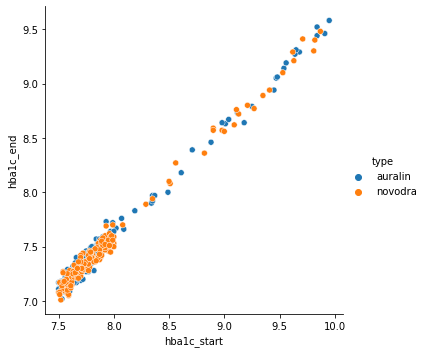

In [58]:
### DATA VISUALIZATION USING PLOTTING LIBRARIES(MODULES)
# using seaborn library
sns.relplot(data = treatments_df, x = treatments_df['hba1c_start'],y = treatments_df['hba1c_end'], hue = treatments_df['type'], kind = 'scatter' )

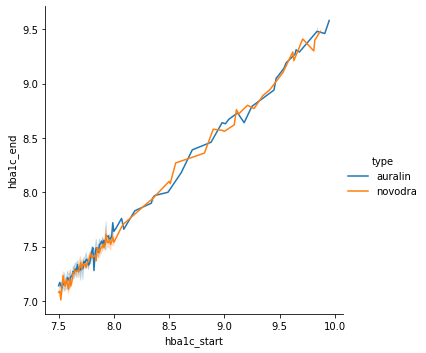

In [62]:
# these visualizations show that auralin and novodra have almost same effect
sns.relplot(data = treatments_df, x = treatments_df['hba1c_start'],y = treatments_df['hba1c_end'], hue = treatments_df['type'], kind = 'line' )

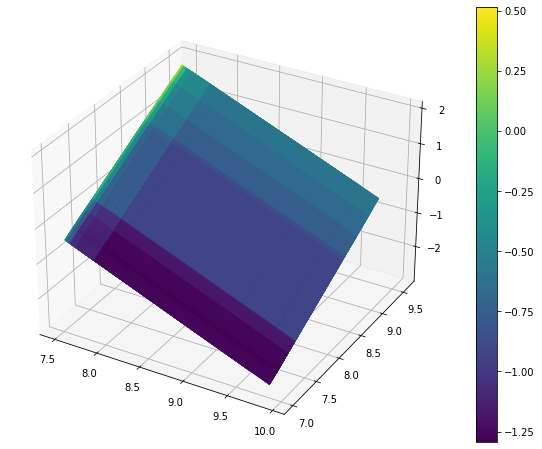

In [72]:
# 3D view of the difference of Auralin and Novodra to clear further confusions about effects
xx , yy = np.meshgrid(treatments_df['hba1c_start'],treatments_df['hba1c_end'])
z = yy - xx
fig = plt.figure(figsize=(12,8))

ax = plt.subplot(projection='3d')


p = ax.plot_surface(xx,yy,z,cmap='viridis')
fig.colorbar(p)

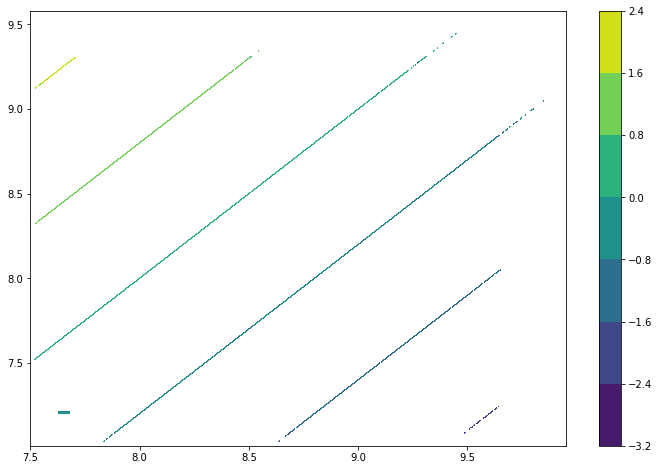

In [73]:
# contour plot to see 3D projection from above to clear further confusions
xx , yy = np.meshgrid(treatments_df['hba1c_start'],treatments_df['hba1c_end'])
z = yy - xx
fig = plt.figure(figsize=(12,8))

ax = plt.subplot()


p = ax.contourf(xx,yy,z,cmap='viridis')
fig.colorbar(p)

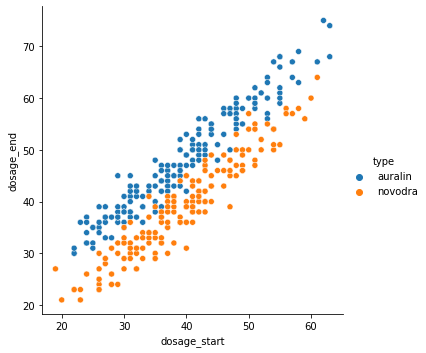

In [77]:
# as you can clearly see in the scatter graph, the dosages of auralin and novodra are almost same as hba1c change.
sns.relplot(treatments_df,x = treatments_df['dosage_start'], y = treatments_df['dosage_end'],hue = treatments_df['type'], kind = 'scatter')

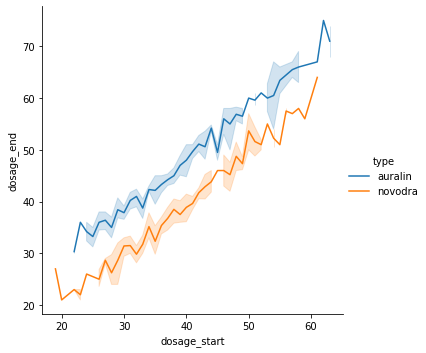

In [78]:
# as you can clearly see in the line graph, the dosages of auralin and novodra are almost same as hba1c change.
sns.relplot(treatments_df,x = treatments_df['dosage_start'], y = treatments_df['dosage_end'],hue = treatments_df['type'], kind = 'line')